In [7]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
from google.colab import files
uploaded=files.upload()


Saving crime_data.csv to crime_data (1).csv


In [9]:
data=pd.read_csv("crime_data.csv")

In [10]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
data.shape

(50, 5)

In [14]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [15]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [16]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])

In [17]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


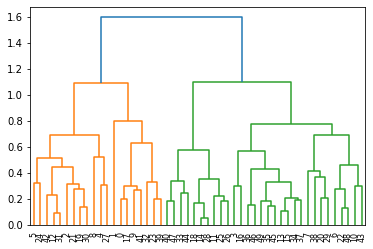

In [18]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

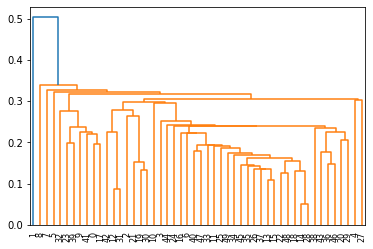

In [19]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

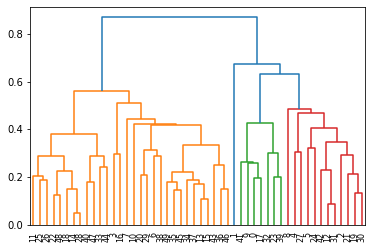

In [20]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

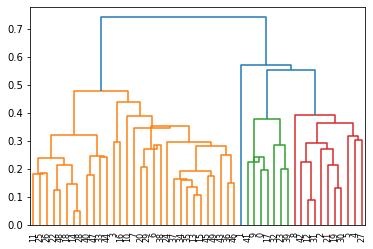

In [21]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [22]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [23]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [24]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [25]:
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [26]:
data['h_clusterid'] = y_hc

In [28]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [29]:
data1=data.sort_values("h_clusterid")
data1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


#Creating clusters for single linkage

In [30]:
# create clusters 
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [32]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='single', n_clusters=5)

In [33]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [34]:
y_hc

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [35]:
data['h_clusterid'] = y_hc

In [37]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [38]:
data1=data.sort_values("h_clusterid")
data1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
0,Alabama,0
27,Nevada,0
28,New Hampshire,0
29,New Jersey,0
30,New Mexico,0
31,New York,0
32,North Carolina,0
33,North Dakota,0
34,Ohio,0
35,Oklahoma,0


#Creating Clusters for average linkagege

In [43]:
# create clusters 
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [44]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [45]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [46]:

y_hc 


array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0])

In [47]:
data['h_clusterid'] = y_hc

In [48]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [49]:
data1=data.sort_values("h_clusterid")
data1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
49,Wyoming,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
36,Oregon,0
20,Massachusetts,0
10,Hawaii,0


Interpretation: For the above dataset (Crime) we formed 5 cluster on the basis of similarities in which the countries from 47 to 38 are formed in one cluster that is 0 , followed by remaining countries.
We formed clusters here on the basis of eucleidian distance.

In this dataset i also used complex linakge ,average linkage and centroid linkage other than single linkage.
And also for dendrogram formation.